<a href="https://colab.research.google.com/github/adrianols02/Desafio-AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [94]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja_1 = pd.read_csv(url)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

loja_1.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

lojas = [loja_1, loja_2, loja_3, loja_4]
nome_lojas = ['loja_1', 'loja_2', 'loja_3', 'loja_4']

#gerar o total de faturamento por loja
faturamento_lojas = [round(sum(i['Preço']), 2) for i in lojas]


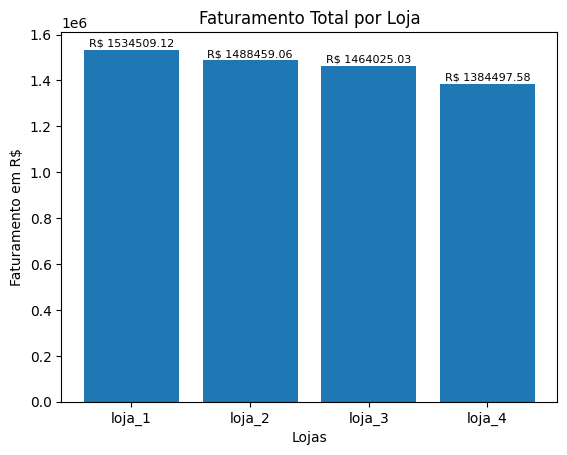

In [96]:

# nomes das lojas como valores do eixo x
plt.bar(nome_lojas, faturamento_lojas)
for i, v in enumerate(faturamento_lojas):
  plt.text(i, v + 15000, f'R$ {v}', ha='center', fontsize=8)

plt.xlabel('Lojas')  # Adiciona label ao eixo x
plt.ylabel('Faturamento em R$')  # Adiciona o label ao eixo y
plt.title('Faturamento Total por Loja')  # Adiciona o título ao gráfico
plt.show()



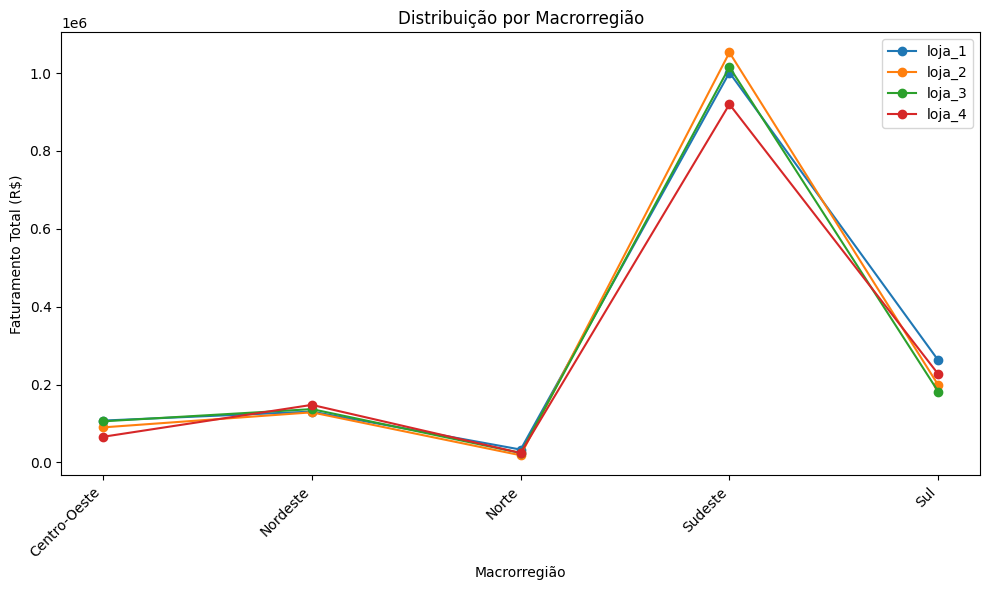

In [97]:
# 1. Cria um mapeamento de regiões para macrorregiões
macroregiao = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

# 2. Cria um dicionário para armazenar os dados de cada loja
faturamento_por_loja_macroregiao = {}

# 3. Itera sobre as lojas e calcular o faturamento por macrorregião
for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Mapear as regiões para macrorregiões
    loja_df['Macroregiao'] = loja_df['Local da compra'].map(macroregiao)

    # Calcula o faturamento por macrorregião
    faturamento_por_macroregiao = loja_df.groupby('Macroregiao')['Preço'].sum()

    faturamento_por_loja_macroregiao[nome_loja] = faturamento_por_macroregiao

# 4. Cria um gráfico de linha para cada loja, mostrando o faturamento por macrorregião
fig, ax = plt.subplots(figsize=(10, 6))

for nome_loja, faturamento_macroregiao in faturamento_por_loja_macroregiao.items():
    ax.plot(faturamento_macroregiao.index, faturamento_macroregiao.values, marker='o', label=nome_loja)

ax.set_xlabel('Macrorregião')
ax.set_ylabel('Faturamento Total (R$)')
ax.set_title('Distribuição por Macrorregião')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

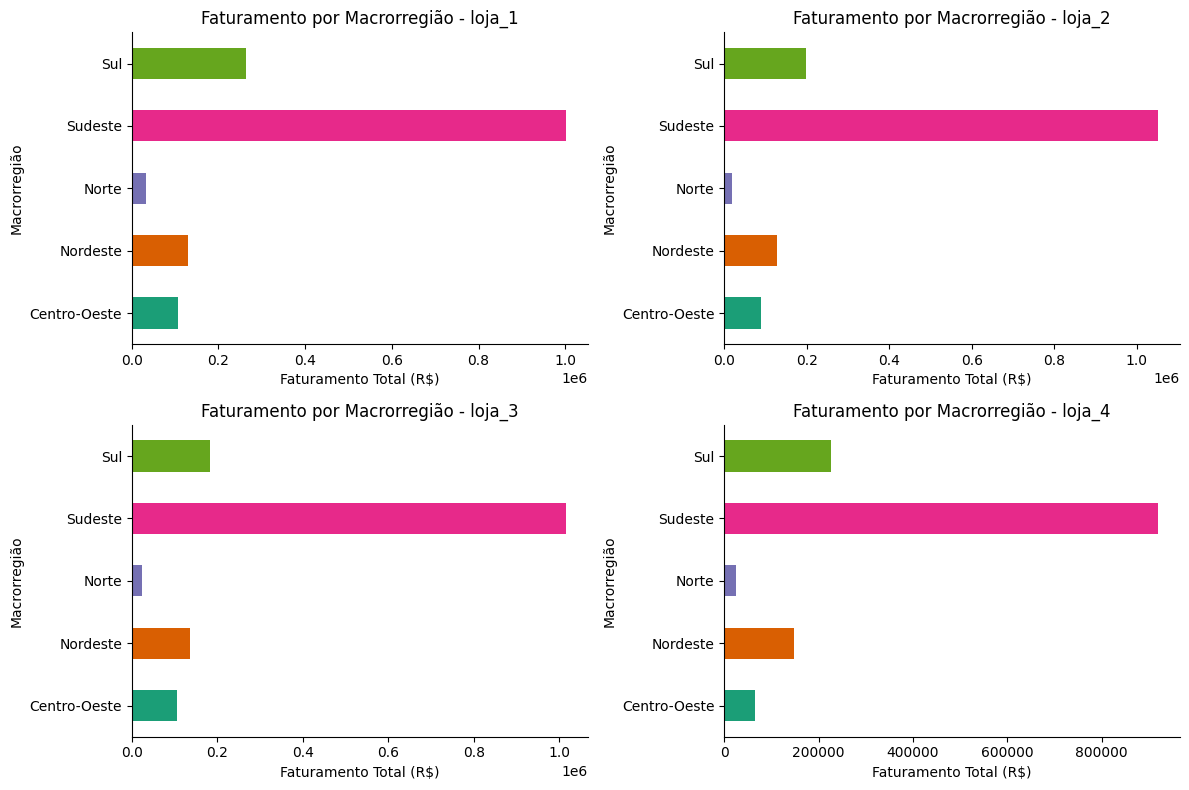

In [98]:

# Criando uma figura com 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas

# Iterando pelas lojas e criando gráficos
for i, (loja, nome) in enumerate(zip(lojas, nome_lojas)): # Dois pontos adicionados aqui
    row = i // 2  # Calcula a linha do subplot
    col = i % 2   # Calcula a coluna do subplot
    ax = axes[row, col]  # Obtém o subplot atual

    # Calcula e plota a receita por região
    loja['Macroregiao'] = loja['Local da compra'].map(macroregiao)  # Adiciona a coluna Macroregiao
    faturamento_por_macroregiao = loja.groupby('Macroregiao')['Preço'].sum()
    faturamento_por_macroregiao.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax)

    ax.set_title(f'Faturamento por Macrorregião - {nome}')
    ax.set_xlabel('Faturamento Total (R$)')
    ax.set_ylabel('Macrorregião')
    ax.spines[['top', 'right']].set_visible(False)

# Ajusta o layout para melhor espaçamento
plt.tight_layout()
plt.show()

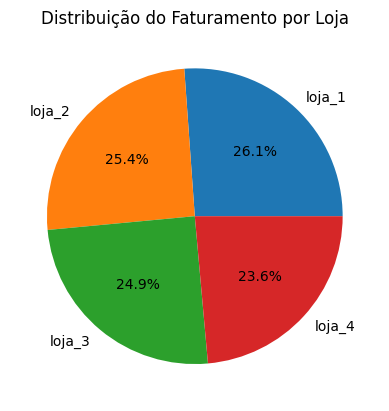

In [99]:
# Criando o gráfico de pizza
plt.pie(faturamento_lojas, labels=nome_lojas, autopct='%1.1f%%')

# Adicionando título
plt.title('Distribuição do Faturamento por Loja')

# Exibindo o gráfico
plt.show()

Conforme dados analisados a loja_4 apresenta o menor desempenho no faturamento entre as outras lojas e o quarto menor faturamento total, com 23,6% de participação no faturamento total das quatro lojas.

# 2. Vendas por Categoria


In [100]:
# Dicionário para armazenar resultados para cada loja
total_categoria_por_loja_vendas = {}

for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Agrupa por categoria e calcular tamanho
    total_categoria = loja_df.groupby('Categoria do Produto')['Preço'].sum()

    # Armazene os resultados da loja atual no dicionário
    total_categoria_por_loja_vendas[nome_loja] = total_categoria

# Acesse os resultados de cada loja
for nome_loja, total_categoria in total_categoria_por_loja_vendas.items():
    print(f"Vendas totais por categorias - {nome_loja}:")
    print(total_categoria)
    print("\n")

Vendas totais por categorias - loja_1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64


Vendas totais por categorias - loja_2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64


Vendas totais por categorias - loja_3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                   

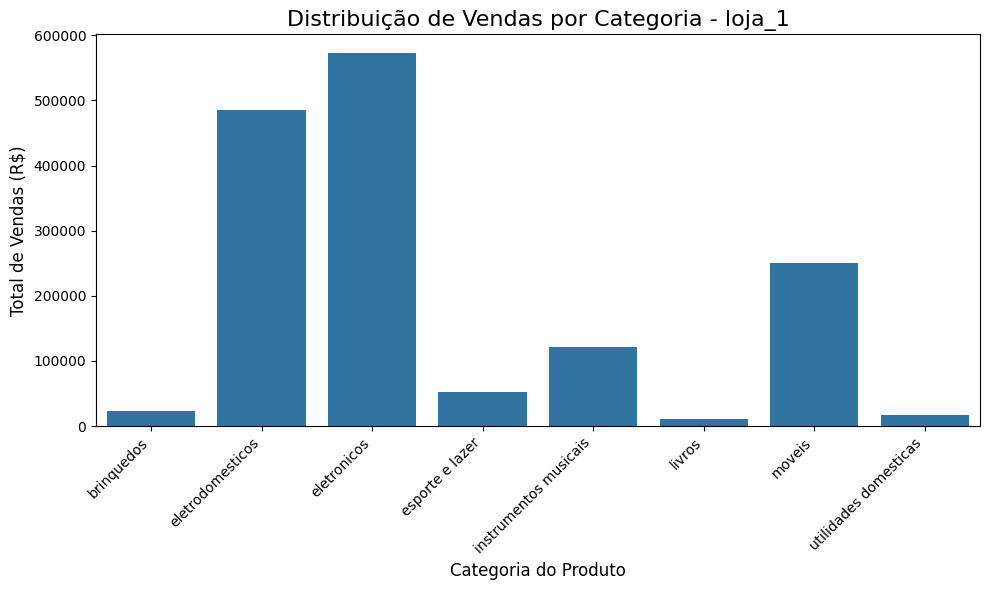

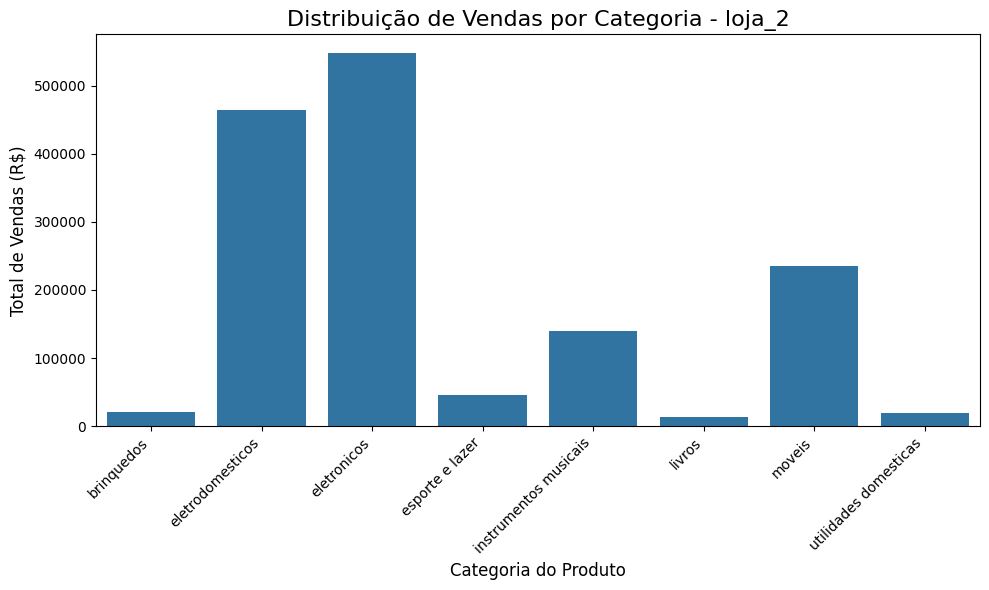

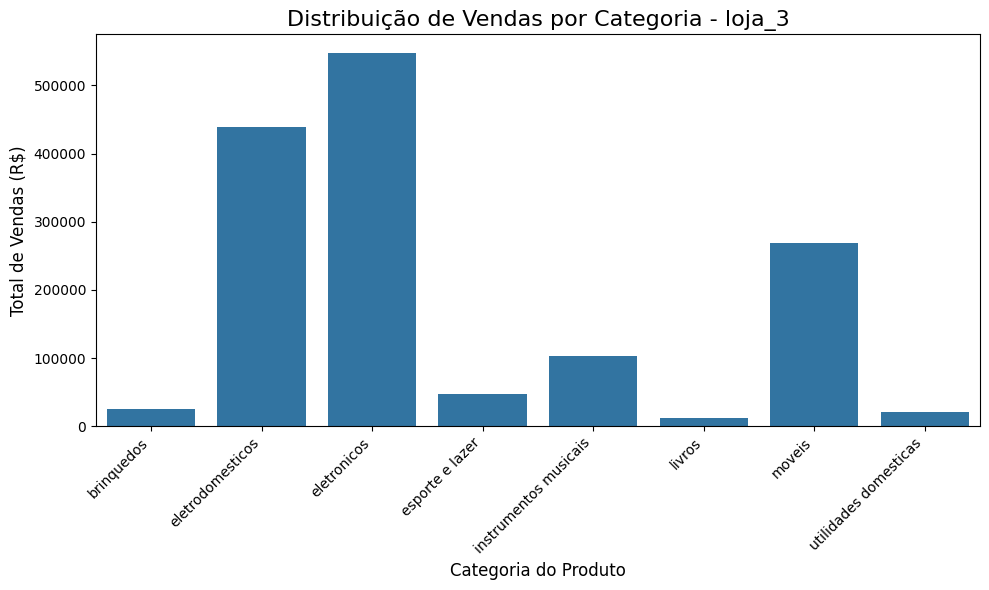

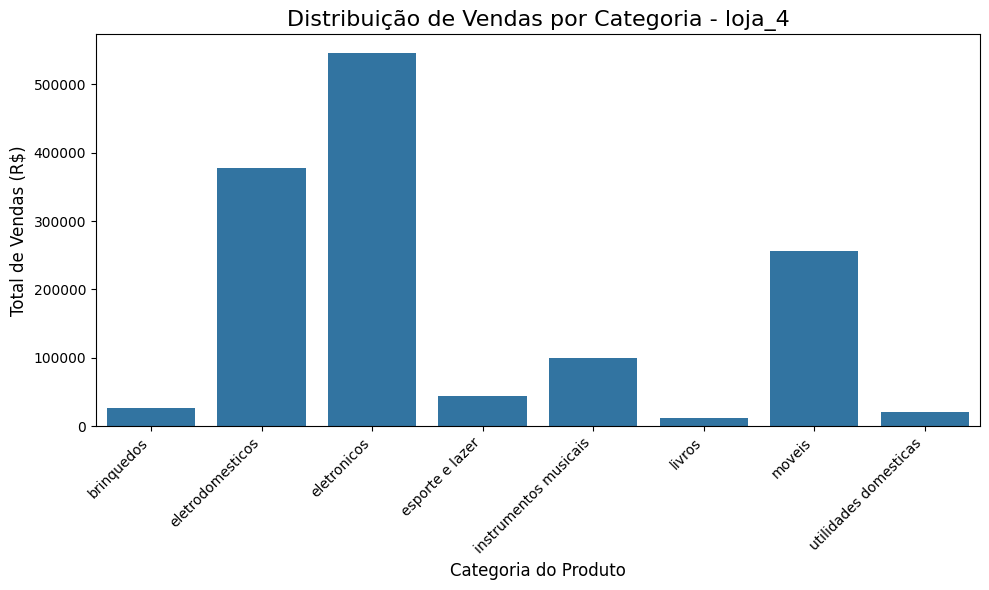

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Iterando pelas lojas e criando gráficos de barras
for nome_loja, total_categoria in total_categoria_por_loja_vendas.items():
    # Criando o gráfico de barras
    plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura conforme necessário

    # Usando seaborn para um gráfico mais estético (opcional)
    sns.barplot(x=total_categoria.index, y=total_categoria.values)

    # Adicionando título e rótulos
    plt.title(f'Distribuição de Vendas por Categoria - {nome_loja}', fontsize=16)
    plt.xlabel('Categoria do Produto', fontsize=12)
    plt.ylabel('Total de Vendas (R$)', fontsize=12)

    # Rotacionando os rótulos do eixo x para melhor legibilidade
    plt.xticks(rotation=45, ha='right')

    # Exibindo o gráfico
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()

In [102]:

# Dicionário para armazenar resultados para cada loja
total_categoria_por_loja = {}

for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Agrupa por categoria e calcular tamanho
    total_categoria = loja_df.groupby('Categoria do Produto').size()

    # Armazene os resultados da loja atual no dicionário
    total_categoria_por_loja[nome_loja] = total_categoria

# Acesse os resultados de cada loja
for nome_loja, total_categoria in total_categoria_por_loja.items():
    print(f"Total de categorias por loja - {nome_loja}:")
    print(total_categoria)
    print("\n")

Total de categorias por loja - loja_1:
Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
dtype: int64


Total de categorias por loja - loja_2:
Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
dtype: int64


Total de categorias por loja - loja_3:
Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177
dtype: int64


Total de categorias por loja - loja_4:
Categoria do Produto
brinquedos         

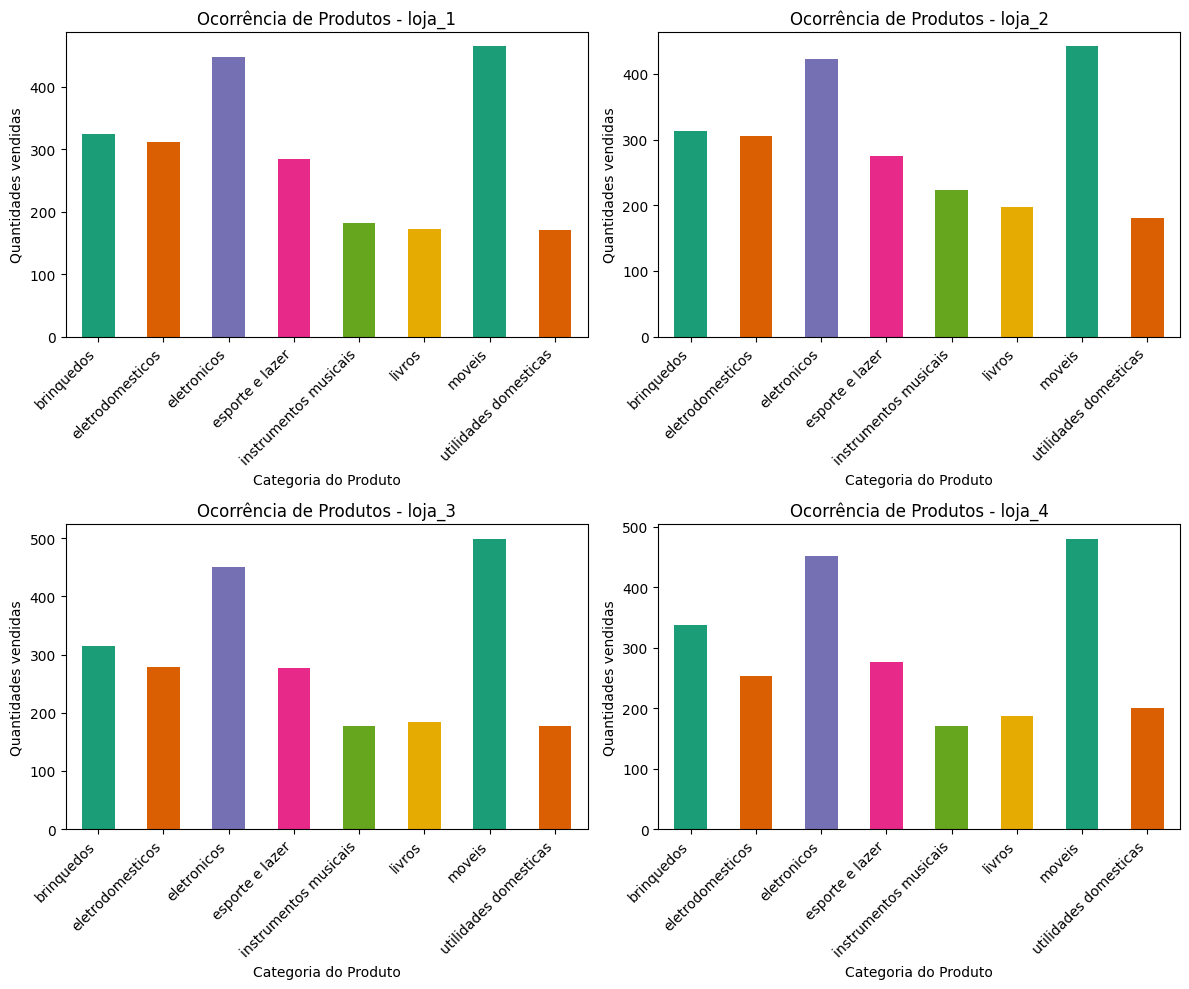

In [103]:
# Criando uma figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 linhas e 2 colunas

# Iterando pelas lojas e criando gráficos
for i, (nome_loja, total_categoria) in enumerate(total_categoria_por_loja.items()):

    # Selecionando o subplot correspondente
    ax = axs[i // 2, i % 2]  # Calcula a posição do subplot
    total_categoria.plot(kind='bar', ax=ax, color=sns.palettes.mpl_palette('Dark2'))

    # Adicionando título e rótulos
    ax.set_title(f'Ocorrência de Produtos - {nome_loja}')
    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Quantidades vendidas')
    ax.set_xticks(range(len(total_categoria)))  # Define os ticks do eixo x
    ax.set_xticklabels(total_categoria.index, rotation=45, ha='right')  # Rótulos do eixo x

# Ajustando o layout
plt.tight_layout()


# Exibindo os gráficos
plt.show()

# 3. Média de Avaliação das Lojas

In [104]:
medias_avaliacoes_lojas = [round(sum(i['Avaliação da compra'])/len(i['Avaliação da compra']),2) for i in lojas]
medias_avaliacoes_lojas

[3.98, 4.04, 4.05, 4.0]

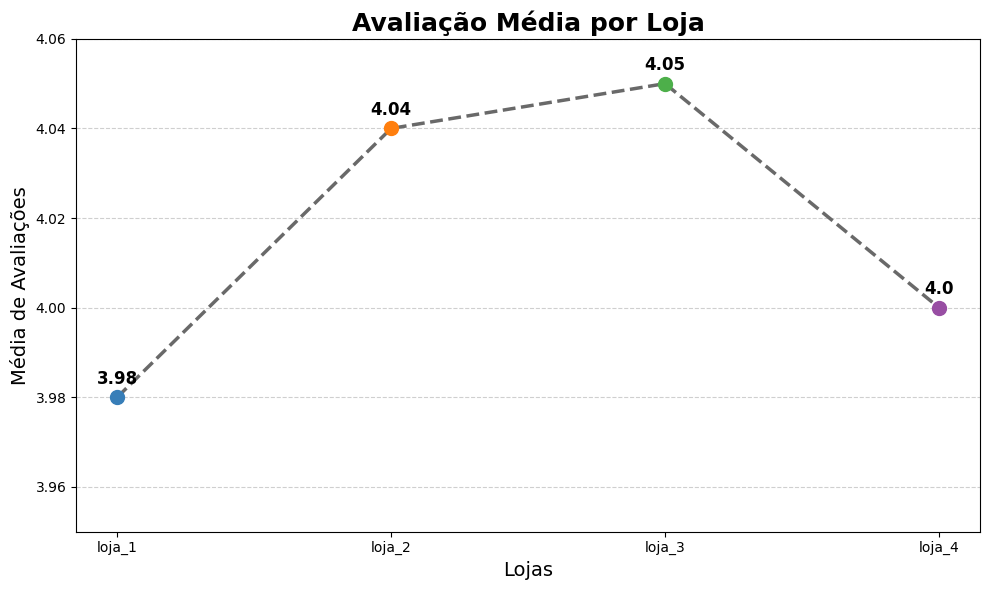

In [105]:
# Cores para os pontos
cores = ['#377eb8', '#ff7f0e', '#4daf4a', '#984ea3']
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(nome_lojas, medias_avaliacoes_lojas, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(nome_lojas)):
    plt.scatter(nome_lojas[i], medias_avaliacoes_lojas[i], color=cores[i], s=100, zorder=3)
    plt.text(nome_lojas[i], medias_avaliacoes_lojas[i] + 0.003, f'{medias_avaliacoes_lojas[i]}', ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

In [106]:
i# Dicionário para armazenar resultados para cada loja
media_avaliacao_produto_por_loja = {}

for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Agrupa por categoria e calcular tamanho
    media_avaliacao_produto = loja_df.groupby('Produto')['Avaliação da compra'].mean()

    # Armazene os resultados da loja atual no dicionário
    media_avaliacao_produto_por_loja[nome_loja] = media_avaliacao_produto

# Acesse os resultados de cada loja
for nome_loja, media_avaliacao_produto in media_avaliacao_produto_por_loja.items():
    print(f"Media de avaliação dos produtos - {nome_loja}:")
    print(media_avaliacao_produto)
    print("\n")

Media de avaliação dos produtos - loja_1:
Produto
Assistente virtual             4.075000
Bateria                        4.188679
Bicicleta                      3.944444
Blocos de montar               4.089286
Bola de basquete               3.872727
Bola de vôlei                  4.071429
Boneca bebê                    3.975000
Cadeira de escritório          3.847826
Cama box                       4.113636
Cama king                      3.772727
Carrinho controle remoto       4.134615
Celular ABXY                   3.818182
Celular Plus X42               3.938776
Ciência de dados com python    4.102564
Copo térmico                   3.888889
Corda de pular                 3.625000
Cubo mágico 8x8                4.068182
Cômoda                         3.803571
Dashboards com Power BI        3.952381
Dinossauro Rex                 3.775000
Faqueiro                       4.230769
Fogão                          4.133333
Fone de ouvido                 3.640000
Geladeira                     

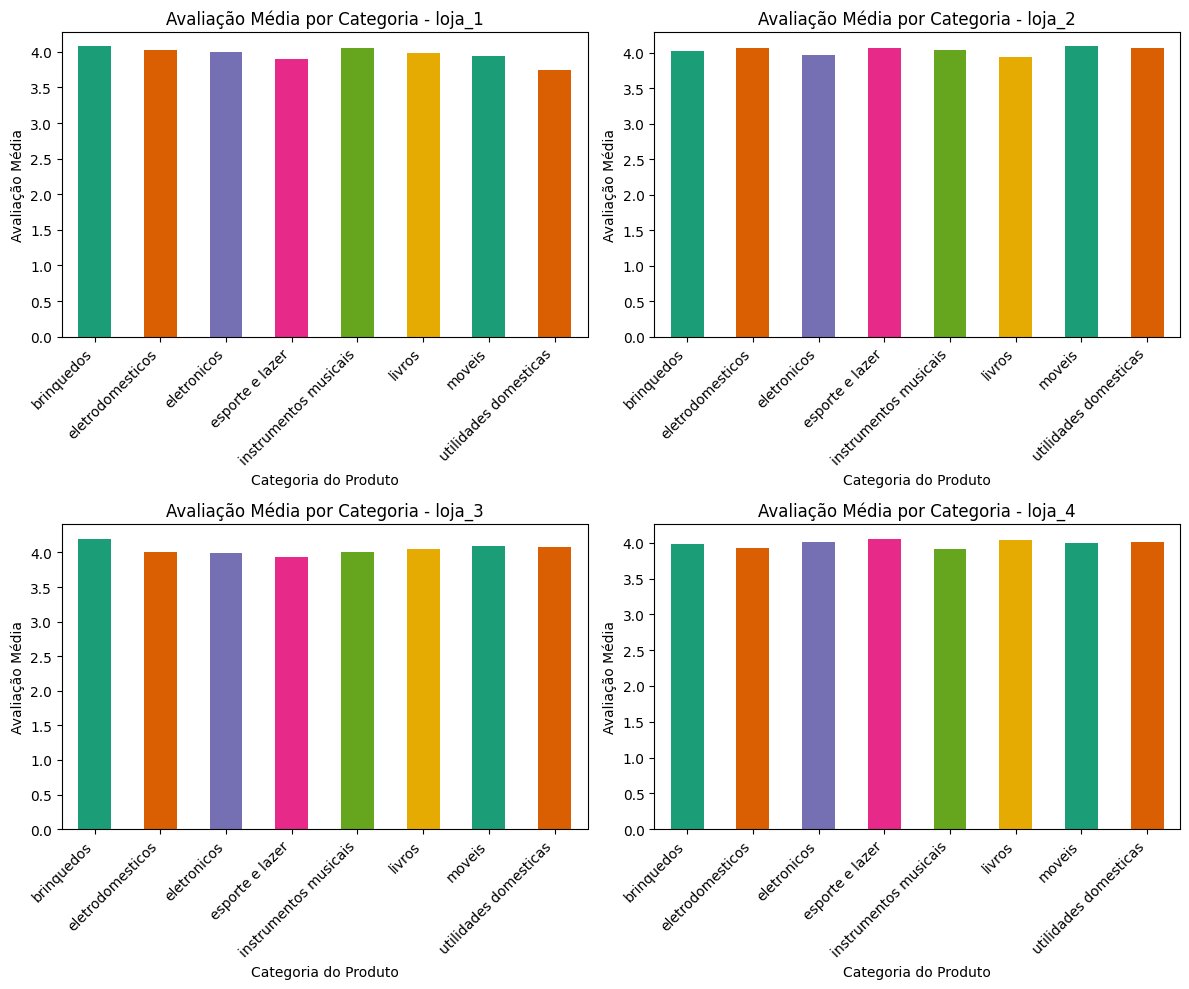

In [107]:
import seaborn as sns

# Dicionário para armazenar resultados para cada loja
media_avaliacao_por_categoria_por_loja = {}

# Re-inicialize 'lojas' para seus DataFrames originais
lojas = [loja_1, loja_2, loja_3, loja_4]

for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Agrupa por categoria e calcula a média da avaliação
    media_avaliacao_por_categoria = loja_df.groupby('Categoria do Produto')['Avaliação da compra'].mean()

    # Armazena os resultados da loja atual no dicionário
    media_avaliacao_por_categoria_por_loja[nome_loja] = media_avaliacao_por_categoria

# Cria uma figura com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 linhas e 2 colunas

# Itera pelas lojas e cria os gráficos
for i, (nome_loja, media_avaliacao_por_categoria) in enumerate(media_avaliacao_por_categoria_por_loja.items()):

    # Seleciona o subplot correspondente
    ax = axs[i // 2, i % 2]  # Calcula a posição do subplot
    media_avaliacao_por_categoria.plot(kind='bar', ax=ax, color=sns.palettes.mpl_palette('Dark2'))

    # Adiciona título e rótulos
    ax.set_title(f'Avaliação Média por Categoria - {nome_loja}')
    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Avaliação Média')
    ax.set_xticks(range(len(media_avaliacao_por_categoria)))  # Define os ticks do eixo x
    ax.set_xticklabels(media_avaliacao_por_categoria.index, rotation=45, ha='right')  # Rótulos do eixo x

# Ajusta o layout
plt.tight_layout()

# Exibe os gráficos
plt.show()

In [108]:
for nome_loja, loja_df in zip(nome_lojas, lojas):
    # Calcular a avaliação média dos produto para loja
    media_avaliacao_por_produto = loja_df.groupby('Produto')['Avaliação da compra'].mean()

    print(f"Avaliação média por produto para {nome_loja}:")
    print(media_avaliacao_por_produto)  # Print the results for each store

Avaliação média por produto para loja_1:
Produto
Assistente virtual             4.075000
Bateria                        4.188679
Bicicleta                      3.944444
Blocos de montar               4.089286
Bola de basquete               3.872727
Bola de vôlei                  4.071429
Boneca bebê                    3.975000
Cadeira de escritório          3.847826
Cama box                       4.113636
Cama king                      3.772727
Carrinho controle remoto       4.134615
Celular ABXY                   3.818182
Celular Plus X42               3.938776
Ciência de dados com python    4.102564
Copo térmico                   3.888889
Corda de pular                 3.625000
Cubo mágico 8x8                4.068182
Cômoda                         3.803571
Dashboards com Power BI        3.952381
Dinossauro Rex                 3.775000
Faqueiro                       4.230769
Fogão                          4.133333
Fone de ouvido                 3.640000
Geladeira                      

# 4. Produtos Mais e Menos Vendidos

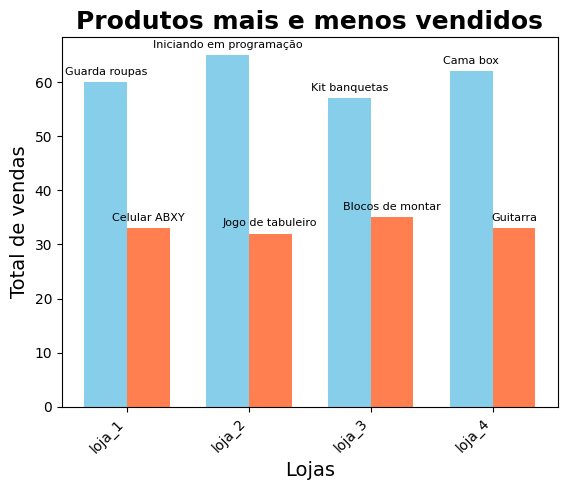

In [109]:
# Listas para armazenar os totais de ocorrências
totais_mais_vendidos = []
totais_menos_vendidos = []

# Loop para calcular os totais de ocorrências
for loja in lojas:
    total_produto = loja.groupby('Produto').size()
    produto_mais_vendido = total_produto.idxmax()
    produto_menos_vendido = total_produto.idxmin()  # Encontra o produto menos vendido

    totais_mais_vendidos.append(total_produto[produto_mais_vendido])
    totais_menos_vendidos.append(total_produto[produto_menos_vendido])  # Armazena o total do menos vendido

# Largura das barras
largura_barra = 0.35

# Posições das barras no eixo x (usando nome_lojas)
posicoes_lojas = nome_lojas
# Posições das barras para mais e menos vendidos (centralizadas em cada loja)
posicoes_mais_vendidos = [i - largura_barra/2 for i in range(len(nome_lojas))]
posicoes_menos_vendidos = [i + largura_barra/2 for i in range(len(nome_lojas))]

# Criação do gráfico de barras
fig, ax = plt.subplots()  # Cria a figura e os eixos

# Cria as barras para mais e menos vendidos, lado a lado para cada loja
barras_mais_vendidos = ax.bar(posicoes_mais_vendidos, totais_mais_vendidos, width=largura_barra, label='Mais Vendidos', color='skyblue')
barras_menos_vendidos = ax.bar(posicoes_menos_vendidos, totais_menos_vendidos, width=largura_barra, label='Menos Vendidos', color='coral')

# ... (código para configurar rótulos dos eixos, título, etc.) ...

# Adiciona rótulos com o nome do produto acima das barras

# Título e rótulos
plt.title('Produtos mais e menos vendidos', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Total de vendas', fontsize=14)

# Define os rótulos do eixo x como os nomes das lojas
ax.set_xticks(range(len(nome_lojas)))  # Define os ticks do eixo x nas posições das lojas
ax.set_xticklabels(nome_lojas, rotation=45, ha='right')  # Define os rótulos do eixo x como os nomes das lojas

def adicionar_rotulos(barras, produtos):
    for barra, produto in zip(barras, produtos):
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, altura + 1, produto, ha='center', va='bottom', fontsize=8)

# Loop para obter os nomes dos produtos mais e menos vendidos
produtos_mais_vendidos = []
produtos_menos_vendidos = []
for loja in lojas:
    total_produto = loja.groupby('Produto').size()
    produtos_mais_vendidos.append(total_produto.idxmax())
    produtos_menos_vendidos.append(total_produto.idxmin())

adicionar_rotulos(barras_mais_vendidos, produtos_mais_vendidos)
adicionar_rotulos(barras_menos_vendidos, produtos_menos_vendidos)

plt.show()

# 5. Frete Médio por Loja


In [110]:
frete_total_lojas = [[i, round(sum(loja['Frete']), 2)] for i, loja in zip(nome_lojas, lojas)]
frete_total_lojas

[['loja_1', 81837.97],
 ['loja_2', 79314.16],
 ['loja_3', 78022.66],
 ['loja_4', 73755.88]]

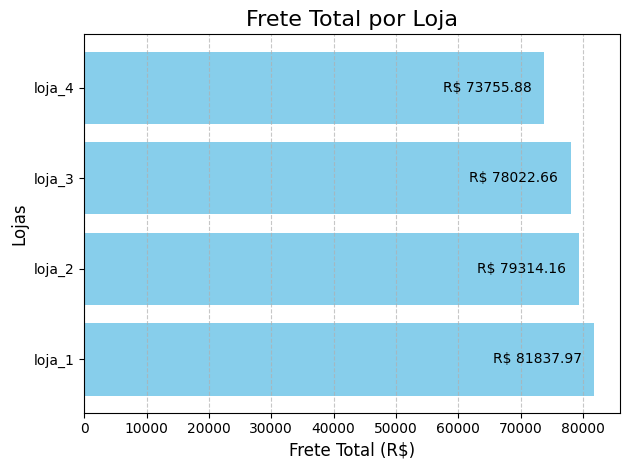

In [111]:
import matplotlib.pyplot as plt

nome_lojas = [loja[0] for loja in frete_total_lojas]  # Extrai nomes das lojas
valores_frete = [loja[1] for loja in frete_total_lojas]  # Extrai custos de frete

# Cria o gráfico de barras horizontais
plt.barh(nome_lojas, valores_frete, color='skyblue')

# Personaliza o gráfico
plt.title('Frete Total por Loja', fontsize=16)
plt.xlabel('Frete Total (R$)', fontsize=12)
plt.ylabel('Lojas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adiciona rótulos de valor às barras com ajustes
for i, v in enumerate(valores_frete):
    if v < max(valores_frete) * 0.2:
        plt.text(v + 500, i, f'R$ {v}', va='center', ha='left', fontsize=10, color='black')
    else:
        plt.text(v - 2000, i, f'R$ {v}', va='center', ha='right', fontsize=10, color='black')

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [112]:
frete_medio_lojas = [round(sum(i['Frete'])/len(i['Frete']),2) for i in lojas]
frete_medio_lojas

[34.69, 33.62, 33.07, 31.28]

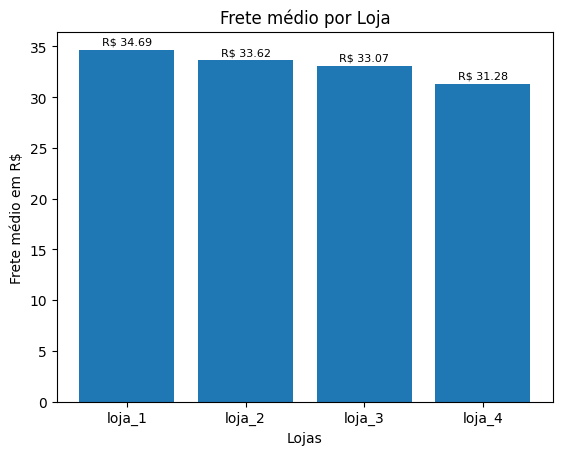

In [113]:
import matplotlib.pyplot as plt

nome_lojas = ['loja_1', 'loja_2', 'loja_3', 'loja_4'] # Colchete de fechamento adicionado

# Use os nomes das lojas como valores do eixo x
plt.bar(nome_lojas, frete_medio_lojas)
for i, v in enumerate(frete_medio_lojas):
  plt.text(i, v + 0.5, f'R$ {v}', ha='center', fontsize=8)

plt.xlabel('Lojas')  # Adiciona rótulo ao eixo x
plt.ylabel('Frete médio em R$')  # Adiciona rótulo ao eixo y
plt.title('Frete médio por Loja')  # Adiciona um título ao gráfico

plt.show()

## Relatório de Recomendação de Venda - Análise de Desempenho das Lojas


Este relatório apresenta uma análise comparativa do desempenho de quatro lojas do grupo, considerando o faturamento total, a distribuição de vendas por categoria, a avaliação média dos clientes, os produtos mais e menos vendidos e o frete médio. O objetivo é fornecer uma base para a tomada de decisões estratégicas sobre o futuro das unidades.

**1. Faturamento Total e Distribuição:**

| Loja   | Faturamento Total (R$) | % de Contribuição |
|--------|-----------------------|--------------------|
| Loja_1 | 1.534.509,12          | 26,1%              |
| Loja_2 | 1.488.459,06          | 25,4%              |
| Loja_3 | 1.464.025,03          | 24,9%              |
| Loja_4 | 1.384.497,58          | 23,6%              |
| **Total** | **5.871.490,80** | **100%** |

**Análise:** A Loja_1 lidera em faturamento total e contribuição para a receita do grupo. A Loja_4 apresenta o menor desempenho nesse quesito.

**2. Venda por Categoria:**

| Loja   | Categoria Mais Vendida | Categoria Menos Vendida(s) |
|--------|-----------------------|---------------------------|
| Loja_1 | Móveis                | Utilidades Domésticas      |
| Loja_2 | Móveis                | Utilidades Domésticas      |
| Loja_3 | Móveis                | Instrumentos Musicais, Utilidades Domésticas |
| Loja_4 | Móveis                | Instrumentos Musicais      |

**Análise:** A categoria de Móveis é a mais popular em todas as lojas. Utilidades Domésticas e Instrumentos Musicais demonstram menor saída em diversas unidades.

**3. Avaliação Média dos Clientes:**

| Loja   | Avaliação Média |
|--------|-----------------|
| Loja_1 | 3,98            |
| Loja_2 | 4,04            |
| Loja_3 | 4,05            |
| Loja_4 | 4,00            |

**Análise:** As avaliações médias indicam um nível de satisfação similar entre as lojas, com ligeira vantagem para a Loja_3.

**4. Produtos Mais e Menos Vendidos:**

| Loja   | Produto Mais Vendido | Produto Menos Vendido |
|--------|----------------------|-----------------------|
| Loja_1 | Guarda Roupas        | Celular ABXY          |
| Loja_2 | Iniciando em Programação | Jogo de Tabuleiro     |
| Loja_3 | Kit Banquetas        | Blocos de Montar      |
| Loja_4 | Cama Box             | Guitarra              |

**Análise:** Há uma variedade nos produtos de maior e menor demanda entre as lojas, sugerindo diferentes perfis de clientes ou focos de mercado.

**5. Frete por Loja:**

| Loja   | Frete Total(R$) |
|--------|-----------------|
| Loja_1 | 81.837,97       |
| Loja_2 | 79.314,16       |
| Loja_3 | 78.022,66       |
| Loja_4 | 73.755,88       |

| Loja   | Frete Medio(R$) |
|--------|---------------- |
| Loja_1 | 34,99           |
| Loja_2 | 33,62           |
| Loja_3 | 33,07           |
| Loja_4 | 31,28           |


**Análise:** A Loja_1 apresenta os maiores custos de frete total e médio. A Loja_4 demonstra os menores valores em ambos os indicadores, o que pode estar relacionado ao seu menor volume de vendas.

**Recomendação de Venda: Loja_4**

Com base na análise dos dados, **recomendo a consideração da venda da Loja_4.**

**Justificativa:**

* **Menor Faturamento:** A Loja_4 consistentemente apresenta o menor faturamento total entre as quatro lojas, impactando negativamente o desempenho geral do grupo.
* **Redundância de Categorias:** Observa-se uma significativa sobreposição nas categorias de produtos com as demais lojas, especialmente na mais vendida (Móveis) e em uma das menos vendidas (Instrumentos Musicais). A demanda por essas categorias pode ser facilmente absorvida pelas outras unidades.
* **Avaliação Abaixo da Média:** Embora a avaliação de 4.0 seja considerada positiva, é a segunda menor entre as lojas, indicando um possível menor nível de satisfação ou fidelização dos clientes em comparação com as demais.
* **Frete Médio como Indicador de Menor Atividade:** O menor custo e média de frete da Loja_4 podem ser um reflexo direto de um menor volume de vendas e, consequentemente, menor movimentação de mercadorias. Isso sugere uma menor atratividade ou competitividade em relação às outras lojas.

